# GEM5 ARM

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum

### vars

In [2]:
gem5Path = '/home/anton/Master/tools/gem5/gem5-Arm/' 
build = 'build/X86/gem5.opt'
gem5 = gem5Path + build

baseDir = './bench/'  + build.replace('.', '-').replace('/','-') + '/'

In [3]:
config = gem5Path + 'configs/example/se.py'

In [4]:
defultOption = "--cpu-type=TimingSimpleCPU --cpu-clock=2GHz --l1d_size=64kB --l1i_size=16kB --caches"

In [5]:
darknet = './darknet'
yolo = 'bench_yolo'
vgg = 'todo' 
darknet19 = 'bench_darknet19'
test = ""

In [6]:
class Program(Enum):
    BASELINE = 0
    NNPACK = 1

## utils

In [7]:
def make(program):
    
    values = ""
    
    match program:
        case Program.BASELINE: values = 'NNPACK=0'        
        case Program.NNPACK:   values = 'NNPACK=1'
            
    os.system('make clean; make'+ ' ' +values ) 

In [8]:
def optionsToSubDir(benchmark, program, tag):
    
    programStr = 'nan'
    
    match program:
        case Program.BASELINE: programStr = 'baseline'        
        case Program.NNPACK: programStr = 'nnpack'

    path = '/'.join([benchmark,programStr,tag]) + '/'
    
    return path

In [9]:
def cyclesToSetup():
    return 0

In [10]:
def readData(Dirs):
    data = []
    names = ['simTicks']
    for Dir in Dirs: 
    
        result = []
    
        with open(Dir+'stats.txt', 'r') as fp:
            lines = fp.readlines()
            for row in lines:
                for name in names:
                    if row.find(name) == 0:
                        value = int(row.split()[1])
                        result.append((name,value))
    
        data.append(result)                
        
    return data

In [11]:
def bench(benchmark, options, program, tag):

    outDir =  baseDir + optionsToSubDir(benchmark, program, tag)
    out = '--outdir='+ outDir
    
    binary = '-c ' + '"'+ darknet  + '"' + ' --options ' + '"' + benchmark + '"'
    
    cmd = ' '.join([gem5,out,config,defultOption,options,binary])
   
    print(cmd + '\n\n')
    
    os.system(cmd)
    
    return(outDir)

In [12]:
def run_benchmark(benchmark, options, nnpack, tag):
    out = bench(benchmark, options, nnpack, tag)
    return(out)

In [13]:
def benchOptions(benchmark, optionsList, program, tags):
    
    n = len(optionsList)
    
    out = [None] * n
    
    for i in range(n):
        out[i] = run_benchmark(benchmark, optionsList[i], program, tags[i])
        
    return(out)

In [14]:
def benchOptionsMatrix(benchmark, options1, options2, nnpack, tags1, tags2): #to bench vector and l2 chace
    options =[opt1 + ' ' + opt2 for opt1 in options1 for opt2 in options2]
    tags = [tag1 + '_' + tag2 for tag1 in tags1 for tag2 in tags2]
    
    out = benchOptions(benchmark, options, nnpack, tags) 
    return(out)

### util graphs

In [15]:
def plotChaceVsCycle(chaces,data):
    cycles = [ i[0][1] for i in data]
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(chaces,cycles)
    plt.show()
    
    

# X86 Darknet19 and L2 chace

In [16]:
chaceSizes = ['256MB','64MB','8MB','1MB']
chaceSizes = ['64MB']
chaceOptions = ['--l2_size=' + size + ' --l2cache' for size in chaceSizes]
chaceOptions

['--l2_size=64MB --l2cache']

## baseline

In [17]:
make(Program.BASELINE)

rm -rf ./obj/gemm.o ./obj/utils.o ./obj/cuda.o ./obj/deconvolutional_layer.o ./obj/convolutional_layer.o ./obj/list.o ./obj/image.o ./obj/activations.o ./obj/im2col.o ./obj/col2im.o ./obj/blas.o ./obj/crop_layer.o ./obj/dropout_layer.o ./obj/maxpool_layer.o ./obj/softmax_layer.o ./obj/data.o ./obj/matrix.o ./obj/network.o ./obj/connected_layer.o ./obj/cost_layer.o ./obj/parser.o ./obj/option_list.o ./obj/detection_layer.o ./obj/route_layer.o ./obj/upsample_layer.o ./obj/box.o ./obj/normalization_layer.o ./obj/avgpool_layer.o ./obj/layer.o ./obj/local_layer.o ./obj/shortcut_layer.o ./obj/logistic_layer.o ./obj/activation_layer.o ./obj/rnn_layer.o ./obj/gru_layer.o ./obj/crnn_layer.o ./obj/demo.o ./obj/batchnorm_layer.o ./obj/region_layer.o ./obj/reorg_layer.o ./obj/tree.o ./obj/lstm_layer.o ./obj/l2norm_layer.o ./obj/yolo_layer.o ./obj/iseg_layer.o ./obj/image_opencv.o libdarknet.so libdarknet.a darknet ./obj/captcha.o ./obj/lsd.o ./obj/super.o ./obj/art.o ./obj/tag.o ./obj/cifar.o ./ob

gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -static -Ofast -c ./examples/lsd.c -o obj/lsd.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -static -Ofast -c ./examples/super.c -o obj/super.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -static -Ofast -c ./examples/art.c -o obj/art.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -static -Ofast -c ./examples/tag.c -o obj/tag.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -static -Ofast -c ./examples/cifar.c -o obj/cifar.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -static -Ofast -c ./examples/go.c -o obj/go.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -static -Ofast -c ./examples/rnn.c -o obj/rnn.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-un

In file included from /usr/include/string.h:535,
                 from include/darknet.h:5,
                 from ./examples/classifier.c:1:
In function ‘strncpy’,
    inlined from ‘run_benchmark_classifier’ at ./examples/classifier.c:635:5:
/usr/include/x86_64-linux-gnu/bits/string_fortified.h:95:10: warning: ‘__builtin_strncpy’ specified bound 256 equals destination size [-Wstringop-truncation]
   95 |   return __builtin___strncpy_chk (__dest, __src, __len,
      |          ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   96 |                                   __glibc_objsize (__dest));
      |                                   ~~~~~~~~~~~~~~~~~~~~~~~~~


gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -static -Ofast -c ./examples/coco.c -o obj/coco.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -static -Ofast -c ./examples/yolo.c -o obj/yolo.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -static -Ofast -c ./examples/detector.c -o obj/detector.o


./examples/detector.c: In function ‘test_detector’:
./examples/detector.c:585:24: warning: ‘return’ with no value, in function returning non-void [-Wreturn-type]
  585 |             if(!input) return;
      |                        ^~~~~~
./examples/detector.c:562:7: note: declared here
  562 | float test_detector(char *datacfg, char *cfgfile, char *weightfile, char *filename, float thresh, float hier_thresh, char *outfile, int fullscreen)
      |       ^~~~~~~~~~~~~


gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -static -Ofast -c ./examples/nightmare.c -o obj/nightmare.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -static -Ofast -c ./examples/instance-segmenter.c -o obj/instance-segmenter.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -static -Ofast -c ./examples/darknet.c -o obj/darknet.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -static -Ofast -c ./examples/test.c -o obj/test.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -static -Ofast obj/captcha.o obj/lsd.o obj/super.o obj/art.o obj/tag.o obj/cifar.o obj/go.o obj/rnn.o obj/segmenter.o obj/regressor.o obj/classifier.o obj/coco.o obj/yolo.o obj/detector.o obj/nightmare.o obj/instance-segmenter.o obj/darknet.o obj/test.o libdarknet.a -o darknet -lm -pthread libdarknet.a


In [21]:
baseline_darknet19_chace_out = benchOptions(yolo,chaceOptions,Program.BASELINE,chaceSizes)

/home/anton/Master/tools/gem5/gem5-Arm/build/X86/gem5.opt --outdir=./bench/build-X86-gem5-opt/bench_yolo/baseline/64MB/ /home/anton/Master/tools/gem5/gem5-Arm/configs/example/se.py --cpu-type=TimingSimpleCPU --cpu-clock=2GHz --l1d_size=64kB --l1i_size=16kB --caches --l2_size=64MB --l2cache -c "./darknet" --options "bench_yolo"


Global frequency set at 1000000000000 ticks per second
gem5 Simulator System.  https://www.gem5.org
gem5 is copyrighted software; use the --copyright option for details.

gem5 version 22.1.0.0
gem5 compiled Jan 24 2023 19:03:31
gem5 started Feb  9 2023 11:11:35
gem5 executing on anton-mint, pid 7026
command line: /home/anton/Master/tools/gem5/gem5-Arm/build/X86/gem5.opt --outdir=./bench/build-X86-gem5-opt/bench_yolo/baseline/64MB/ /home/anton/Master/tools/gem5/gem5-Arm/configs/example/se.py --cpu-type=TimingSimpleCPU --cpu-clock=2GHz --l1d_size=64kB --l1i_size=16kB --caches --l2_size=64MB --l2cache -c ./darknet --options bench_yolo

info: Standard input is not 

In [19]:
baseline_darknet19_chace_data = readData(baseline_darknet19_chace_out)

RuntimeError: matplotlib does not support generators as input

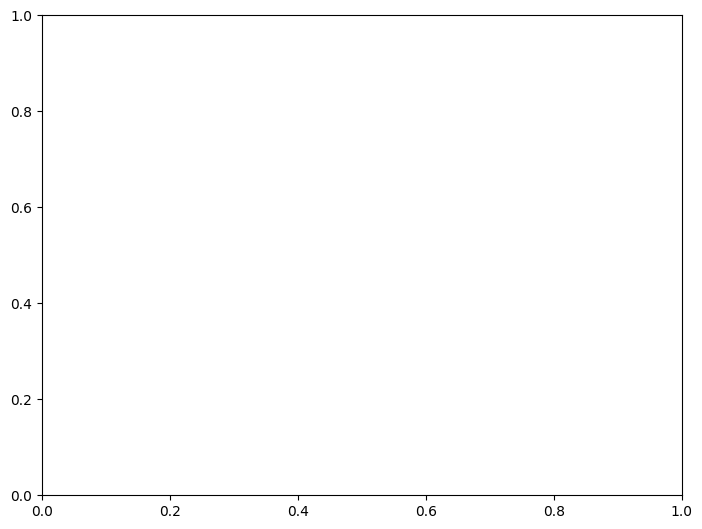

In [20]:
plotChaceVsCycle(reversed(chaceSizes),reversed(baseline_darknet19_chace_data))

## nnpack

In [ ]:
#make(Program.NNPACK)

In [ ]:
#nnpack_darknet19_chace_out = benchOptions(darknet19,chaceOptions,Program.NNPACK,chaceSizes)

In [ ]:
#nnpack_darknet19_chace_data = readdata(nnpack_darknet19_chace_out)

In [ ]:
plotChaceVsCycle(chaceSize.reverse(),baseline_darknet19_chace_data.reverse())